In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
import os
from numpy import outer
#import commands
#import pyhue

In [7]:
bridge = pyhue.Bridge('192.168.1.102', 'newdeveloper')
for light in bridge.lights:
    light.on = True
    light.hue = 0

AttributeError: 'list' object has no attribute 'keys'

In [ ]:
bridge.ip_address

In [6]:
bridge.username

'newdeveloper'

In [3]:
data = pd.read_csv('../smadata/2013/227-20130801.csv', header=8, sep=';', parse_dates={'time':[0]})
data2 = pd.read_csv('../smadata/2013/229-20130801.csv', header=8, sep=';', parse_dates={'time':[0]})

OSError: File b'../smadata/2013/227-20130801.csv' does not exist

In [8]:
def RGB2XY(red, green, blue):
    """
    Convert a RGB color into a Hue XY color.
    translated from https://github.com/PhilipsHue/PhilipsHueSDKiOS
    """
    if red > 0.04045:
        R = ((red + 0.055) / (1.0 + 0.055))**2.4
    else:
        R= red / 12.92
    
    if green > 0.04045:
        G = ((green + 0.055) / (1.0 + 0.055))**2.4
    else: 
        G = green / 12.92
        
    if blue > 0.04045:
        B = ((blue + 0.055) / (1.0 + 0.055))**2.4
    else: 
        B = blue / 12.92
    
    X = R * 0.649926 + G * 0.103455 + B * 0.197109 
    Y = R * 0.234327 + G * 0.743075 + B * 0.022598
    Z = R * 0.0000000 + G * 0.053077 + B * 1.035763
    x = X / (X + Y + Z + 0.000001)
    y = Y / (X + Y + Z + 0.000001)
    return x,y

def RGB2XY2(A):
    return RGB2XY(A[0],A[1],A[2])

def rgb2xyz2(A):
    return pyhue.rgb2xy(A[0],A[1],A[2])

In [12]:
bridge.lights[0].xy = pyhue.rgb2xy(1.,1.0,1.0)
bridge.lights[1].xy = pyhue.rgb2xy(1.,1.0,1.0)
bridge.lights[2].xy = pyhue.rgb2xy(0.,0.0,1.0)

In [21]:
data = pd.read_csv('sunny/svalin_3_30_2016.csv')

In [22]:
from matplotlib.pylab import *
%matplotlib inline

In [23]:
cmap=get_cmap('gist_rainbow')

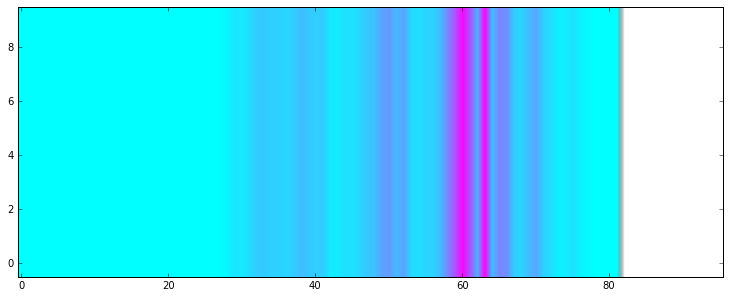

In [24]:
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
imshow(outer(data['House 2']/5.0,ones(10)).T,aspect='auto',cmap=get_cmap('cool'),origin="lower")


In [46]:
for i in cm.datad.keys():
    print('{cname:"%s"},'%(i))

{cname:"gist_gray"},
{cname:"RdPu_r"},
{cname:"Set3_r"},
{cname:"gray"},
{cname:"Set2"},
{cname:"gist_ncar_r"},
{cname:"gist_ncar"},
{cname:"Accent"},
{cname:"YlGn"},
{cname:"RdYlBu"},
{cname:"BrBG_r"},
{cname:"Pastel2_r"},
{cname:"YlGn_r"},
{cname:"hot_r"},
{cname:"YlOrRd_r"},
{cname:"Spectral_r"},
{cname:"BrBG"},
{cname:"Purples"},
{cname:"terrain_r"},
{cname:"PuRd"},
{cname:"summer_r"},
{cname:"gist_heat"},
{cname:"flag_r"},
{cname:"gist_earth_r"},
{cname:"PuBuGn"},
{cname:"PuBu"},
{cname:"gist_gray_r"},
{cname:"hsv_r"},
{cname:"binary_r"},
{cname:"PiYG_r"},
{cname:"gist_yarg"},
{cname:"OrRd"},
{cname:"GnBu_r"},
{cname:"coolwarm_r"},
{cname:"RdYlGn"},
{cname:"spectral"},
{cname:"Wistia_r"},
{cname:"Dark2"},
{cname:"PuOr_r"},
{cname:"PiYG"},
{cname:"seismic"},
{cname:"RdPu"},
{cname:"Spectral"},
{cname:"Reds"},
{cname:"Oranges_r"},
{cname:"nipy_spectral"},
{cname:"Blues"},
{cname:"YlOrBr_r"},
{cname:"gist_stern_r"},
{cname:"CMRmap"},
{cname:"PRGn_r"},
{cname:"Greens_r"},
{cname:"BuGn

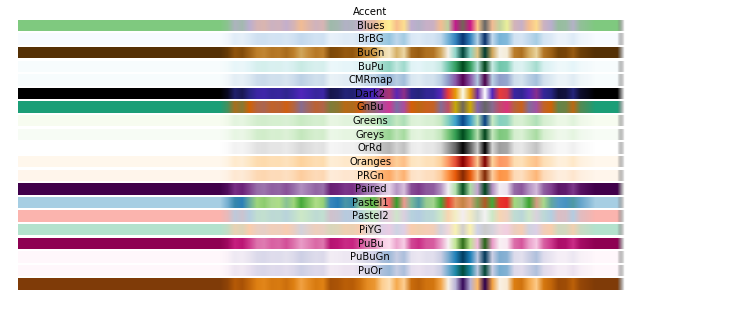

In [42]:
rc('text', usetex=False)
a=outer(data['House 2']/5.0,ones(10)).T
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps[:20]):
    subplot(20,1,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,fontsize=10)

In [33]:
outer?

In [34]:
rc('text', usetex=False)
a=outer(data.kW/5.0,ones(10))
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps):
    print i, m

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-34-10d5c339093a>, line 9)

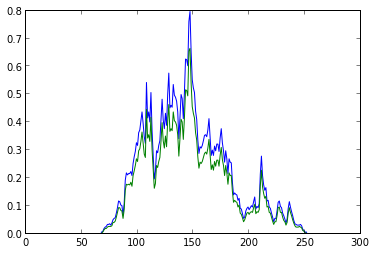

In [14]:
plot(data.kW/5.0)
plot(data2.kW/5.0)

In [15]:
cmap = get_cmap('Oranges')
for d0, d1 in zip(data.kW, data2.kW):
    if d0>0.00001:
        bridge.lights[0].xy = RGB2XY2(cmap(d1/5.0)[:-1])
        bridge.lights[1].xy = RGB2XY2(cmap(d0/5.0)[:-1])
#    print d0/5.0, d1/5.0, cmap(d0/5.0)[:-1]

## Finishing
for i in range(5):
    bridge.lights[0].xy = RGB2XY(1,0,0)
    bridge.lights[1].xy = RGB2XY(1,1,1)
    bridge.lights[0].xy = RGB2XY(1,1,1)    
    bridge.lights[1].xy = RGB2XY(1,0,0)
    

In [56]:
for i in range(5):
    bridge.lights[0].xy = RGB2XY(1,0,0)
    bridge.lights[1].xy = RGB2XY(1,1,1)
    bridge.lights[0].xy = RGB2XY(1,1,1)    
    bridge.lights[1].xy = RGB2XY(1,0,0)

Dehors

In [52]:
cmap = get_cmap('Oranges')
for d0, d1 in zip(data.kW, data2.kW):
    if d0>0.00001:
        bridge.lights[0].xy = RGB2XY2(cmap(d1/5.0)[:-1])
        bridge.lights[1].xy = RGB2XY2(cmap(d0/5.0)[:-1])
        bridge.lights[2].xy = RGB2XY2(cmap(d0/5.0)[:-1])
#    print d0/5.0, d1/5.0, cmap(d0/5.0)[:-1]

## Finishing
for i in range(5):
    bridge.lights[0].xy = RGB2XY(1,0,0)
    bridge.lights[1].xy = RGB2XY(1,0,0)
    bridge.lights[2].xy = RGB2XY(1,0,0)
    bridge.lights[0].xy = RGB2XY(1,1,1)
    bridge.lights[1].xy = RGB2XY(1,1,1)    
    bridge.lights[2].xy = RGB2XY(1,1,1)    


HueException: Not able to connect to the bridge

In [56]:
for i in range(5):
    bridge.lights[0].xy = RGB2XY(1,0,0)
    bridge.lights[1].xy = RGB2XY(1,0,0)
    bridge.lights[2].xy = RGB2XY(1,0,0)
    bridge.lights[0].xy = RGB2XY(1,1,1)
    bridge.lights[1].xy = RGB2XY(1,1,1)    
    bridge.lights[2].xy = RGB2XY(1,1,1)    


Lava effect

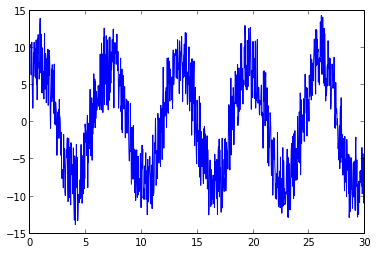

In [49]:
x = linspace(0.0,30.0,1000)
def f(x, n):
    for i in x:
        new = old + rand()*n
        yield new
plot(x, [f(x, n)])

In [44]:
x

0.41943054553193826

In [62]:
for i in range(1,55000,100):
    bridge.lights[0].hue = i 
    bridge.lights[1].hue = i + 5000   
    bridge.lights[2].hue = i + 10000   

HueException: Not able to connect to the bridge

In [61]:
bridge.lights[1].hue = 65000